In [6]:
# Celda 1: Cargar datos procesados y objetivo
import pandas as pd

# Cargar características y objetivo
X = pd.read_csv('../data/processed/X_processed.csv')
y = pd.read_csv('../data/processed/y.csv').squeeze()

# Verificar dimensiones
print("📊 Dimensiones de X:", X.shape)
print("📊 Dimensiones de y:", y.shape)

# Verificar que todos los valores sean numéricos
if not X.dtypes.apply(lambda dtype: pd.api.types.is_numeric_dtype(dtype)).all():
    raise ValueError("❌ Algunas columnas no son numéricas. Revisa el preprocesamiento.")
else:
    print("✅ Todos los valores son numéricos.")

📊 Dimensiones de X: (4418, 231)
📊 Dimensiones de y: (4418,)
✅ Todos los valores son numéricos.


In [7]:
# Celda 2: Entrenar modelo y mostrar métricas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar modelo
y_pred = model.predict(X_test)
print("📊 Informe de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular AUC-ROC
try:
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"✅ AUC-ROC: {auc:.2f}")
except Exception as e:
    print("⚠️ No se pudo calcular AUC-ROC:", str(e))

📊 Informe de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       442
           1       0.88      0.95      0.91       442

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884

✅ AUC-ROC: 0.97


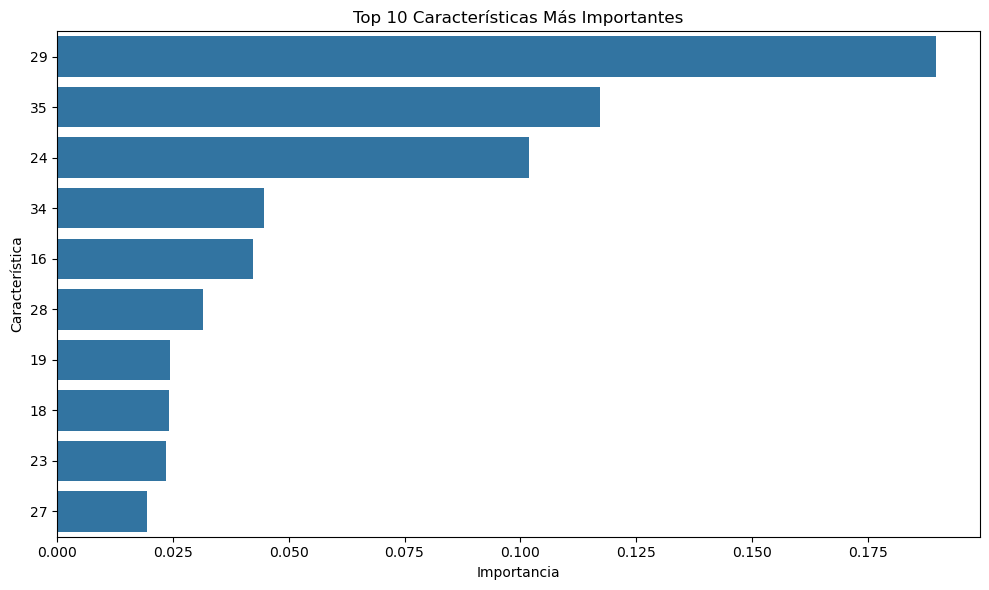

In [8]:
# Celda 3: Visualización - Importancia de características
import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de características (Random Forest)
importances = model.feature_importances_
feature_names = X.columns
features_df = pd.DataFrame({'Característica': feature_names, 'Importancia': importances})
features_df = features_df.sort_values(by='Importancia', ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=features_df)
plt.title('Top 10 Características Más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [9]:
# Celda 4: Validación cruzada
from sklearn.model_selection import cross_val_score

# Validación cruzada (F1-Score)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print(f"🔁 Validación cruzada (F1-Score): {scores.mean():.2f} ± {scores.std():.2f}")

🔁 Validación cruzada (F1-Score): 0.92 ± 0.02


<Figure size 640x480 with 0 Axes>

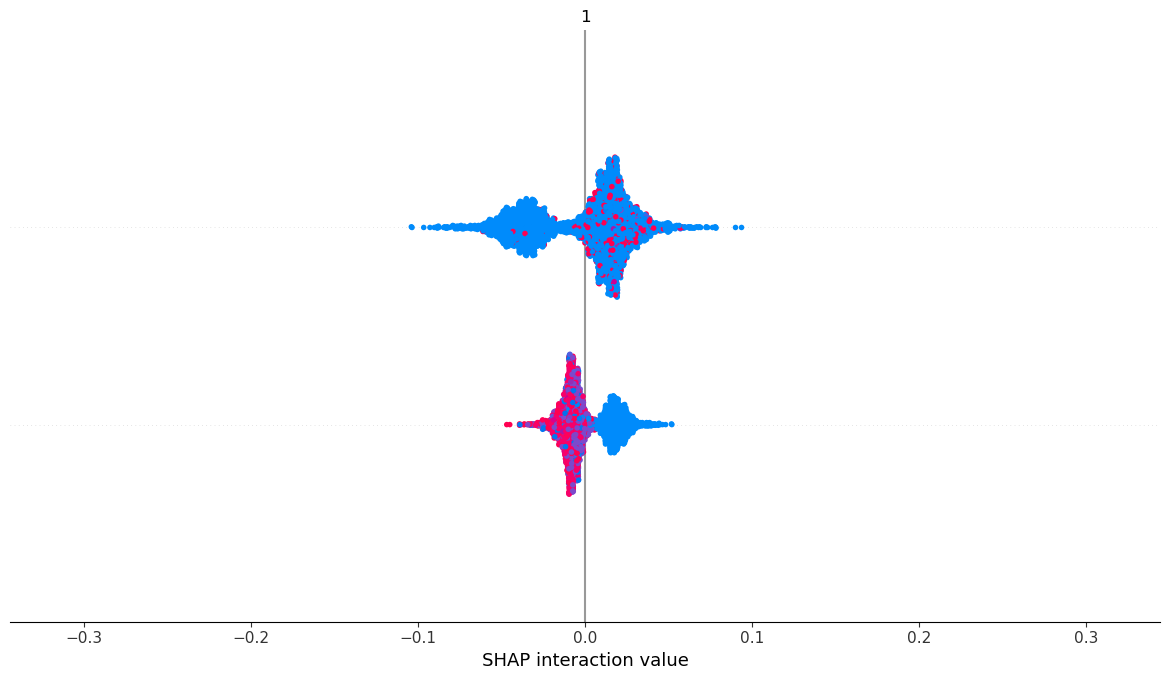

In [10]:
# Celda 5: Interpretación con SHAP
import shap

# Explicar predicciones
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Gráfico de resumen
shap.summary_plot(shap_values, X_train, plot_type="bar")